In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATASET_RATEBEER = 'DATA/RateBeer/'

In [55]:
df_rb_beer = pd.read_csv(DATASET_RATEBEER + 'beers.csv')
df_rb_breweries = pd.read_csv(DATASET_RATEBEER + 'breweries.csv')
df_rb_users = pd.read_csv(DATASET_RATEBEER + 'users.csv')

print('shape of all datasets: \n',
     'beer',df_rb_beer.shape,'\n',
      'users',df_rb_users.shape,'\n',
     'breweries',df_rb_breweries.shape)

shape of all datasets: 
 beer (442081, 14) 
 users (70174, 5) 
 breweries (24189, 4)


Exploration of the three datasets: 

In [4]:
df_rb_beer.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


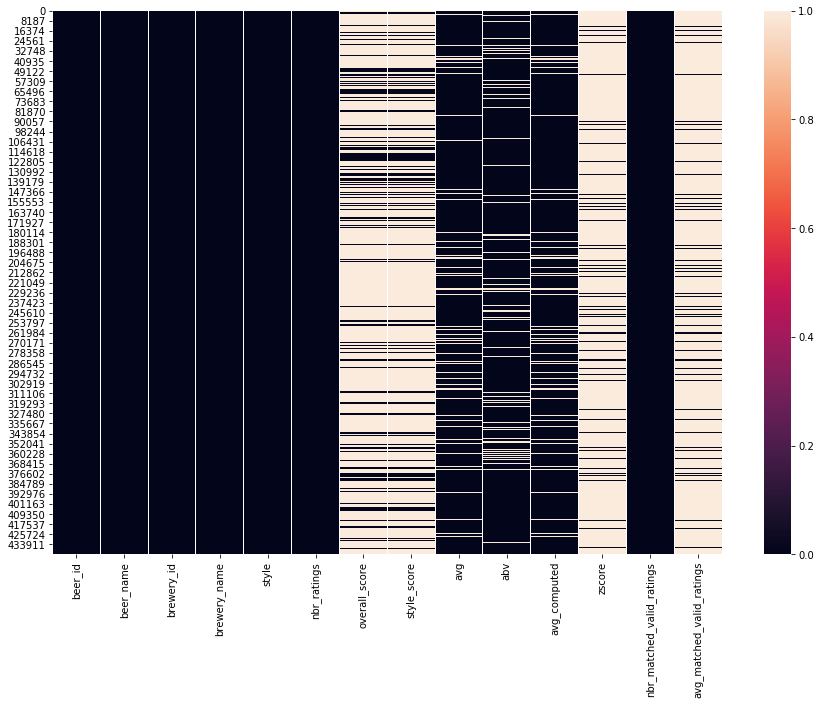

In [5]:
# show in white the nan values in a column
plt.figure(figsize=(15,10))
sns.heatmap(df_rb_beer.isna(), cbar=True)

In [7]:
(df_rb_beer.isna().sum()/df_rb_beer.shape[0]).sort_values(ascending=True)

beer_id                      0.000000
beer_name                    0.000000
brewery_id                   0.000000
brewery_name                 0.000000
style                        0.000000
nbr_ratings                  0.000000
nbr_matched_valid_ratings    0.000000
abv                          0.095218
avg_computed                 0.102676
avg                          0.105012
style_score                  0.764595
overall_score                0.764686
zscore                       0.904479
avg_matched_valid_ratings    0.904479
dtype: float64

In [8]:
df_rb_breweries.head()

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


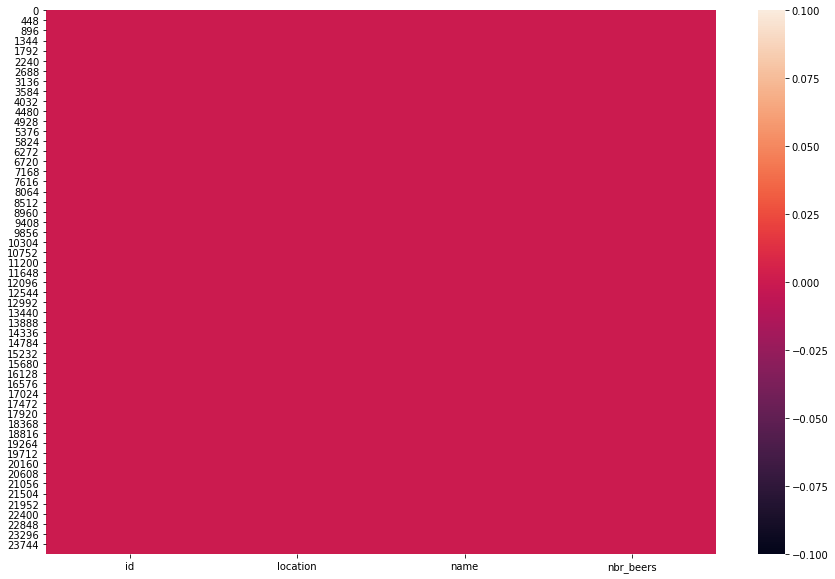

In [10]:
# show in white the nan values in a column
plt.figure(figsize=(15,10))
sns.heatmap(df_rb_breweries.isna(), cbar=True)

In [12]:
(df_rb_breweries.isna().sum()/df_rb_breweries.shape[0]).sort_values(ascending=True)

id           0.0
location     0.0
name         0.0
nbr_beers    0.0
dtype: float64

In [13]:
df_rb_users.head()

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany


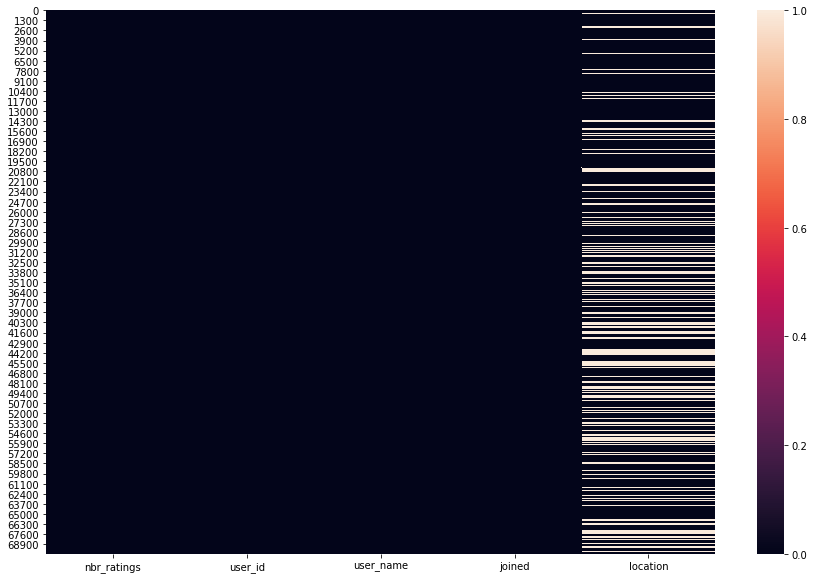

In [14]:
# show in white the nan values in a column
plt.figure(figsize=(15,10))
sns.heatmap(df_rb_users.isna(), cbar=True)

In [15]:
(df_rb_users.isna().sum()/df_rb_users.shape[0]).sort_values(ascending=True)

nbr_ratings    0.000000
user_id        0.000000
user_name      0.000000
joined         0.000428
location       0.279049
dtype: float64

Users stats

In [51]:
df_rb_users.shape

(70174, 5)

In [49]:
df_rb_users["user_id"].nunique() #there are some users that are several times in the dataset.

70120

In [67]:
df_rb_users_by_id=(df_rb_users.groupby(by="user_id")).to_frame()

AttributeError: 'DataFrameGroupBy' object has no attribute 'to_frame'

In [64]:
df_rb_users_by_id.head()

,user_id,nbr_ratings,user_name,joined,location
0,2,1,1,1,1
1,3,1,1,1,1
2,7,1,1,1,1
3,10,1,1,1,1
4,15,1,1,1,1


In [60]:
#number of countries the users come from
df_rb_users_by_id["location"].nunique()

user_id
2         1
3         1
7         1
10        1
15        1
         ..
489662    1
489669    1
489869    1
489908    0
489914    1
Name: location, Length: 70120, dtype: int64

In [44]:
location_users=df_rb_users["location"].value_counts()
#5 locations with the most users
location_users.head()

Canada                         3255
United States, California      2804
England                        2734
Poland                         1701
United States, Pennsylvania    1632
Name: location, dtype: int64

Text(0, 0.5, 'Number of reviews')

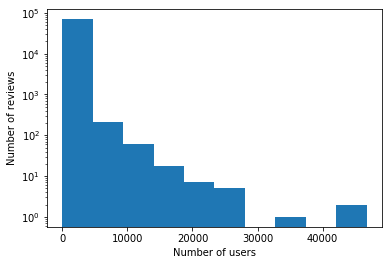

In [4]:
df_rb_users['nbr_ratings'].plot(kind="hist",logx=False,logy=True)
plt.xlabel("Number of users")
plt.ylabel("Number of reviews")

In [38]:
#user10 is the number of users having written <10 reviews
#userx_y is the number of users having written x<= nb_reviews < y 
#user10000 is the number of users having written >= 10000 reviews
user10=(df_rb_users['nbr_ratings']<10).sum()
user10_100=(df_rb_users['nbr_ratings']<100).sum()-user10
user100_1000=(df_rb_users['nbr_ratings']<1000).sum()-user10-user10_100
user1000_10000=(df_rb_users['nbr_ratings']<10000).sum()-user10-user10_100-user100_1000
user10000=(df_rb_users['nbr_ratings']>=10000).sum()

print('Number of users with less than 10 reviews: {} '.format(user10))
print('Number of users having written between 10 and 100 reviews: {} '.format(user10_100))
print('Number of users having written between 100 and 1000 reviews: {} '.format(user100_1000))
print('Number of users having written between 1000 and 10000 reviews: {} '.format(user1000_10000))
print('Number of users having written more than 10000 reviews: {} '.format(user10000))

#sanity check

user10+user10_100+user100_1000+user1000_10000+user10000==df_rb_users.shape[0]



Number of users with less than 10 reviews: 52430 
Number of users having written between 10 and 100 reviews: 11325 
Number of users having written between 100 and 1000 reviews: 4753 
Number of users having written between 1000 and 10000 reviews: 1589 
Number of users having written more than 10000 reviews: 77 


True

Breweries stats

In [45]:
df_rb_breweries.head()

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


In [68]:
df_rb_breweries.shape

(24189, 4)

In [47]:
df_rb_breweries["location"].nunique()

267

In [46]:
location_breweries=df_rb_breweries["location"].value_counts()
#5 locations with the most breweries
location_users.head()

Canada                         3255
United States, California      2804
England                        2734
Poland                         1701
United States, Pennsylvania    1632
Name: location, dtype: int64

Funnily enough, the 5